<a href="https://colab.research.google.com/github/Eliezer1995385/ACTIVIDADES-Y-PIA-1995385/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0452-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0453-0001-0002.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0453-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0455-0001.jpeg  
  inflating: /content/chest_xray/chest_xray/train/NORMAL/IM-0456-0001.jpeg  
  inflating: /conten

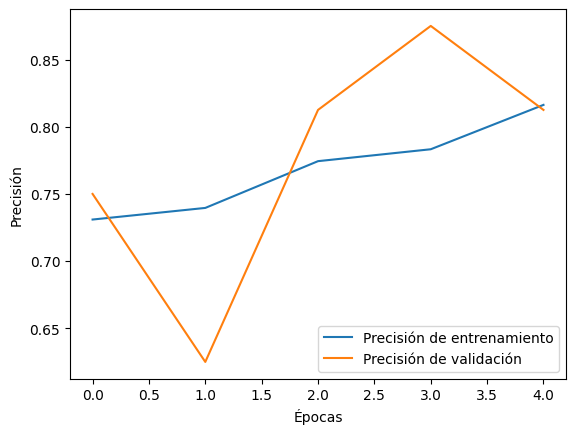

Por favor, sube hasta 5 imágenes para la predicción


Saving person80_bacteria_391.jpeg to person80_bacteria_391.jpeg
Saving person81_bacteria_396.jpeg to person81_bacteria_396.jpeg
Saving person82_bacteria_403.jpeg to person82_bacteria_403 (1).jpeg
Saving NORMAL2-IM-0352-0001.jpeg to NORMAL2-IM-0352-0001.jpeg
Saving NORMAL2-IM-0359-0001.jpeg to NORMAL2-IM-0359-0001.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicción para person80_bacteria_391.jpeg: ('Pneumonia', 0.8659496)


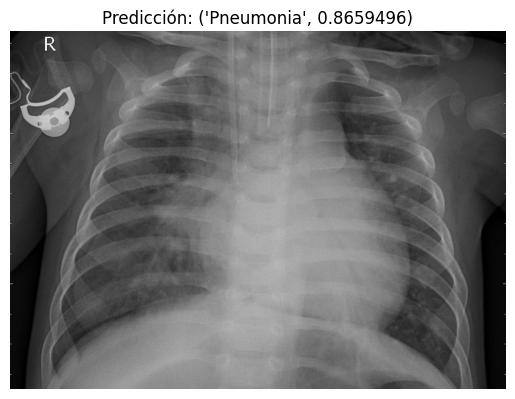

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicción para person81_bacteria_396.jpeg: ('Pneumonia', 0.9083277)


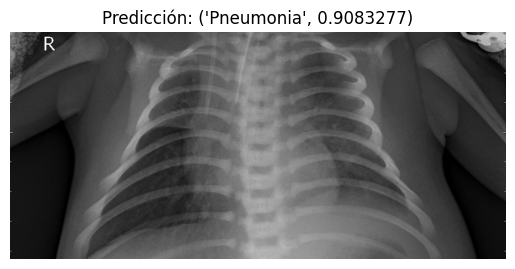

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicción para person82_bacteria_403 (1).jpeg: ('Pneumonia', 0.9484353)


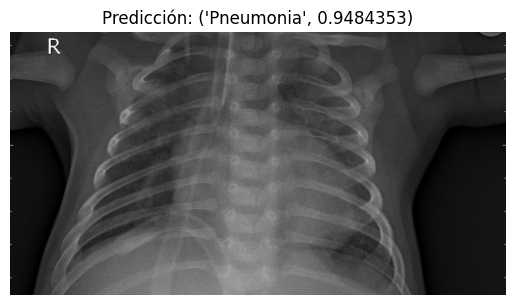

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicción para NORMAL2-IM-0352-0001.jpeg: ('Normal', 0.47736973)


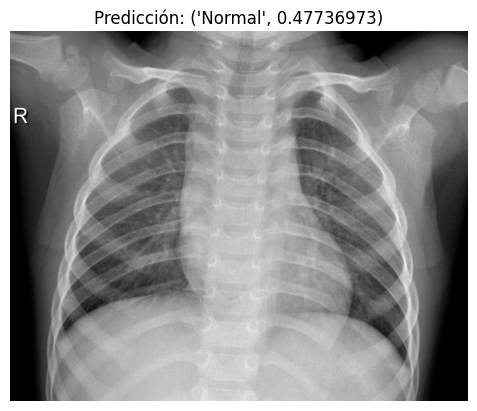

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicción para NORMAL2-IM-0359-0001.jpeg: ('Normal', 0.42222726)


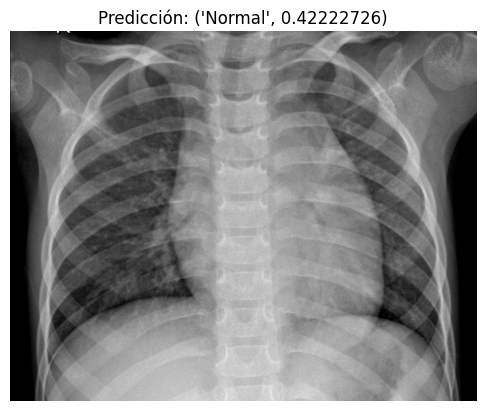

In [5]:
#ELIEZER RICARDO HERRERA OLIVA 1995385 IMTC
# Instalar la API de Kaggle
!pip install kaggle

# Subir el archivo kaggle.json
from google.colab import files
files.upload()

# Configurar la autenticación de Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Descargar el conjunto de datos desde Kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Descomprimir el archivo descargado
!unzip chest-xray-pneumonia.zip -d /content/chest_xray

# Importar bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/chest_xray/chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory( '/content/chest_xray/chest_xray/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Definición de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento de la CNN
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Por ejemplo, 100 pasos por época
    epochs=5

    ,
    validation_data=validation_generator,
    validation_steps=50  # Por ejemplo, 50 pasos de validación
)

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

# Función para predecir si una imagen es "Pneumonia" o "Normal"
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)[0][0]
    label = "Pneumonia" if prediction > 0.5 else "Normal"
    return label, prediction

# Subir hasta 5 imágenes manualmente desde tu computadora
print("Por favor, sube hasta 5 imágenes para la predicción")
uploaded = files.upload()

# Mostrar predicciones para cada imagen subida
for img_name in uploaded.keys():
    # Realizar predicción
    result = predict_image(img_name)
    print(f"Predicción para {img_name}: {result}")

    # Mostrar la imagen
    img = image.load_img(img_name)
    plt.imshow(img)
    plt.title(f"Predicción: {result}")
    plt.axis('off')
    plt.show()


